Problem Statement


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Hypothesis Generation

Hypothesis generation is an educated “guess” of various factors that are impacting the business problem that needs to be solved using machine learning.

Hypotheses based on the problem statement:

Sales are higher during weekends.

Sales are higher during morning hours and late evening.

Sales are higher during end of the year.

Sales are higher during festivals.

Sales is affected by the Store size.

Sales is affected by Location of the store.

Low Fat Fod items are purchased more than regular fat food items.

Sales are higher for processsed food.

Supermarkets are preferred over grocery stores.

Loading Packages and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv('/content/Test.csv')

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [ ]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Data Structure and Content

In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [ ]:
test.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,4705.000000,5681,5681.000000,5681,5681.000000,5681,5681.000000,4075,5681,5681
unique,1543,NaN,5,NaN,16,NaN,10,NaN,3,3,4
top,DRF48,NaN,Low Fat,NaN,Snack Foods,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1
freq,8,NaN,3396,NaN,789,NaN,624,NaN,1862,2233,3717
mean,NaN,12.695633,NaN,0.065684,NaN,141.023273,NaN,1997.828903,NaN,NaN,NaN
std,NaN,4.664849,NaN,0.051252,NaN,61.809091,NaN,8.372256,NaN,NaN,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.990000,NaN,1985.000000,NaN,NaN,NaN
25%,NaN,8.645000,NaN,0.027047,NaN,94.412000,NaN,1987.000000,NaN,NaN,NaN
50%,NaN,12.500000,NaN,0.054154,NaN,141.415400,NaN,1999.000000,NaN,NaN,NaN
75%,NaN,16.700000,NaN,0.093463,NaN,186.026600,NaN,2004.000000,NaN,NaN,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Exploratory Data Analysis

In [ ]:
# Checking for null values 
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
#Checking for duplicates
train.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

In [ ]:
train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


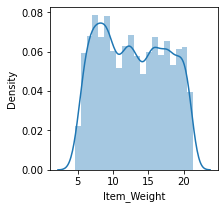

In [ ]:
#Item_Weight distribution
plt.figure(figsize=(3,3))
sns.distplot(train['Item_Weight'])
plt.show()

Univariate Analysis

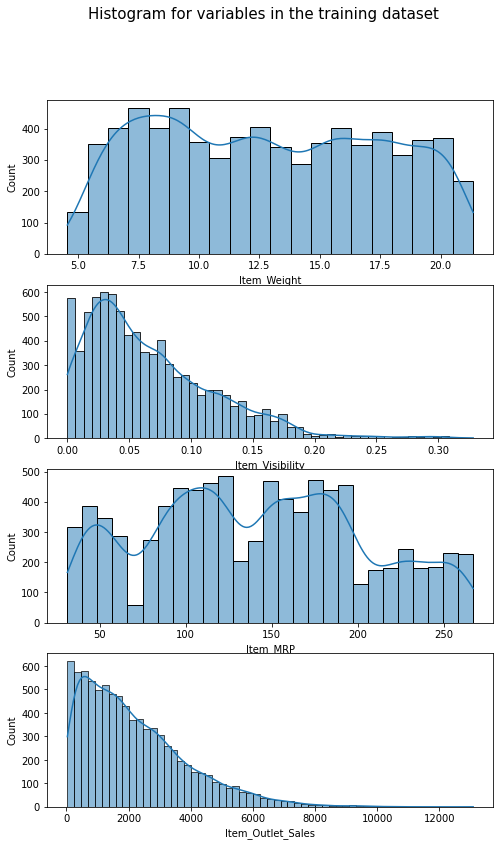

In [ ]:
# Histogram for the numerical variables.
fig, ax = plt.subplots(4, 1, figsize = (8, 13))

sns.histplot(ax = ax[0],data = train, x='Item_Weight', kde=True)
sns.histplot(ax = ax[1],data = train, x='Item_Visibility', kde=True)
sns.histplot(ax = ax[2], data =train, x = 'Item_MRP', kde = True)
sns.histplot(ax = ax[3], data =train, x = 'Item_Outlet_Sales', kde = True)

fig.suptitle('Histogram for variables in the training dataset', size = 15)
plt.show()

Insights

1. lot of items have a weight of 12.5
2. Majority of the items have visibility less than 0.20
3. More items have the price of 50, 100 and between 150 to 200.
4. Sales for most items lies in the range of 0 to 2000 and gradually keeps on dicreasing.

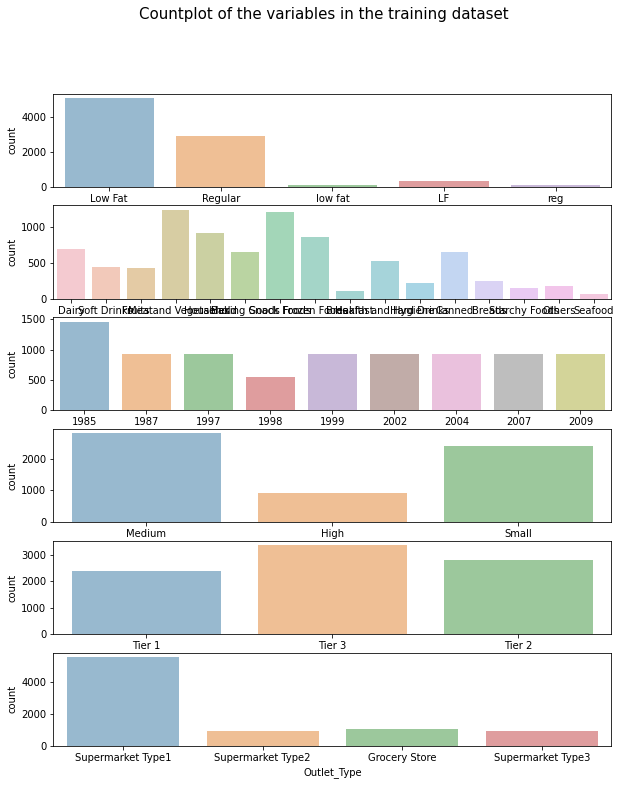

In [ ]:
# Countplot for categorical variables
fig, ax = plt.subplots(6, 1, figsize = (10, 12))

sns.countplot(ax = ax[0],data = train, x='Item_Fat_Content', alpha=0.5)
sns.countplot(ax = ax[1],data = train, x='Item_Type', alpha=0.5)
sns.countplot(ax = ax[2], data =train, x ='Outlet_Establishment_Year', alpha=0.5)
sns.countplot(ax = ax[3], data =train, x ='Outlet_Size', alpha=0.5)
sns.countplot(ax = ax[4], data =train, x ='Outlet_Location_Type', alpha=0.5)
sns.countplot(ax = ax[5], data =train, x ='Outlet_Type', alpha=0.5)

fig.suptitle('Countplot of the variables in the training dataset', size = 15)
plt.show()

insights

1. low fat food items are mostly sold rather than regular food items.
2. No of items of each types of food itemd sold are plotted.
3. More than 1400 outlet were established in 1985.
4. Majority of Outlets are of medium size.
5. Major outlets are in Tier 3 locactions followed by Tier 2 and Tier 1.
6. Majority Outlets belong to Supermarket Type 1

Bivariate Analysis

In [ ]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [ ]:
test.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.019089,0.049809,0.018918
Item_Visibility,-0.019089,1.000000,-0.014013,-0.097040
Item_MRP,0.049809,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.018918,-0.097040,-0.007233,1.000000


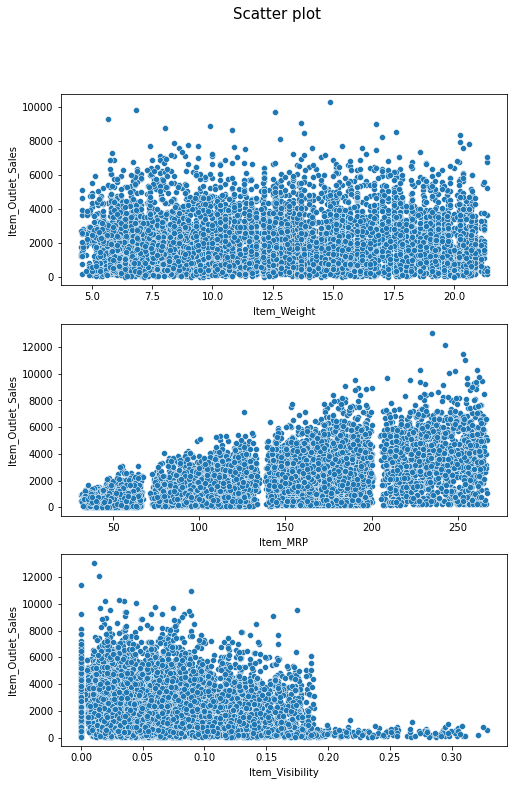

In [ ]:
# scatter plot for numerical variables with sales.
fig, ax = plt.subplots(3, 1, figsize = (8, 12))

sns.scatterplot(ax = ax[0],data = train, x = 'Item_Weight', y='Item_Outlet_Sales')
sns.scatterplot(ax = ax[1],data = train,x='Item_MRP',y='Item_Outlet_Sales')
sns.scatterplot(ax = ax[2], data =train, x ='Item_Visibility', y='Item_Outlet_Sales')

fig.suptitle('Scatter plot', size = 15)
plt.show()

Insights

1. Majority sales happen for item with weight 12.5.
2.  MRP and sales have a linear relationship.
3. Sales are higher for items with visibility less than 0.2.

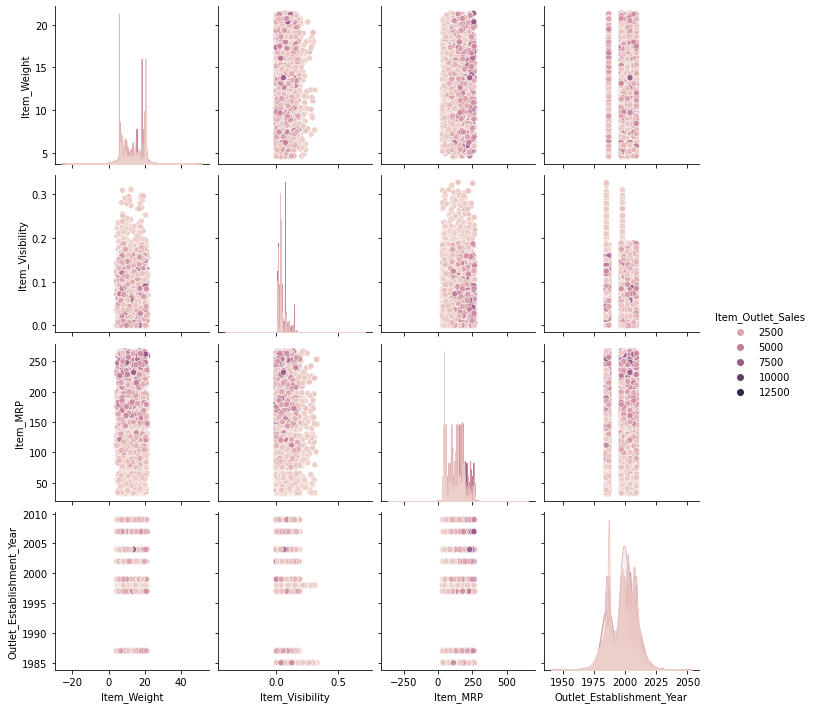

In [ ]:
sns.pairplot(train, hue='Item_Outlet_Sales')

Missing Value Treatment

In [ ]:
# Item_Weight-continous variable-replace with mean
train["Item_Weight"].fillna(train["Item_Weight"].mean(),inplace=True)
test["Item_Weight"].fillna(test["Item_Weight"].mean(),inplace=True)

In [ ]:
# Outlet_Size-categorial variable-replace with mode
train["Outlet_Size"].fillna(train["Outlet_Size"].mode() [0],inplace=True)
test["Outlet_Size"].fillna(test["Outlet_Size"].mode() [0],inplace=True)

In [ ]:
train.isna().sum().sum()

0

In [ ]:
test.isna().sum().sum()

0

Feature Engineering

In [ ]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
train.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace=True)
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
test.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [ ]:
test.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace=True)
test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

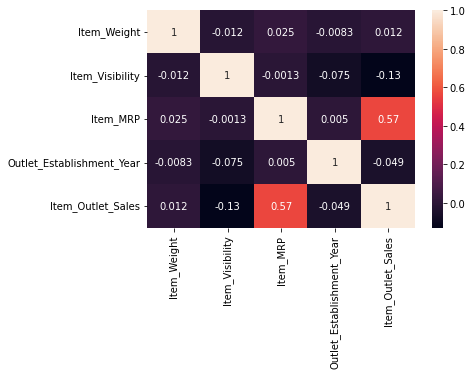

In [ ]:
sns.heatmap(train.corr(),annot=True)
plt.show()

Insights

1. Item_Outlet_Sales and Item_Visibility are negatively correlated
2.  Item_Outlet_Sales is correlated with Item_MRP
3. Item weight is least correlated with other variables

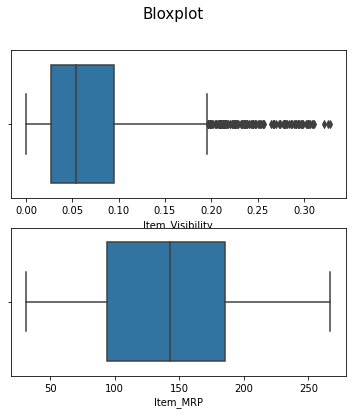

In [ ]:
#Boxplots to find outliers
fig, ax = plt.subplots(2, 1, figsize = (6,6))

sns.boxplot(ax = ax[0],data = train, x ="Item_Visibility")
sns.boxplot(ax = ax[1],data = train,x='Item_MRP')

fig.suptitle('Bloxplot',size = 15)
plt.show()

In [ ]:
print(train['Item_Visibility'].mean(),train['Item_Visibility'].mode() [0],train['Item_Visibility'].median())

0.06613202877895108 0.0 0.053930934


In [ ]:
#imputing item visibility with median for 0s as there are outliers.
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].median())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].median())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


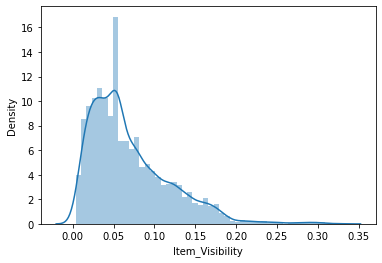

In [ ]:
sns.distplot(train['Item_Visibility'])
plt.show()

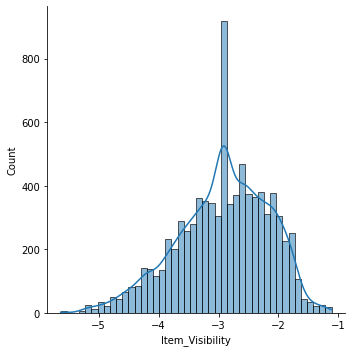

In [ ]:
#Removing Skewness
sns.displot(x=np.log(train.Item_Visibility),kde=True)

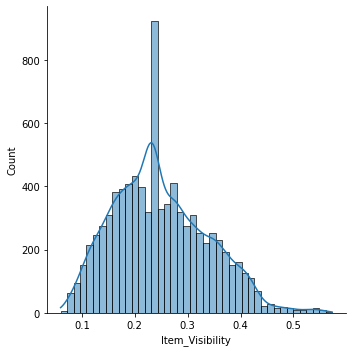

In [ ]:
sns.displot(x=np.sqrt(train.Item_Visibility),kde=True)

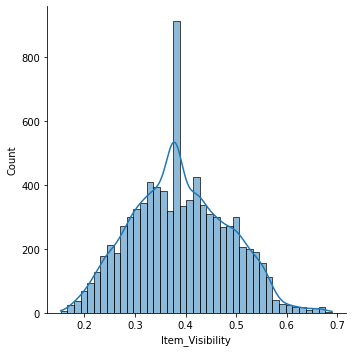

In [ ]:
sns.displot(x=np.cbrt(train.Item_Visibility),kde=True)

cube root transformation was advantageous over log and square root transformations.

In [ ]:
train['Item_Visibility'] = np.cbrt(train['Item_Visibility'])

Encoding Categorical Variables

Encode the values for categorical variables:

1. Item_Fat_Content
2. Item_Type
3. Outlet_Size
4. Outlet_Location_Type
5. Outlet_Type

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
train['Item_Fat_Content']= le.fit_transform(train['Item_Fat_Content'])
train['Item_Type']= le.fit_transform(train['Item_Type'])

In [ ]:
test['Item_Fat_Content']= le.fit_transform(test['Item_Fat_Content'])
test['Item_Type']= le.fit_transform(test['Item_Type'])

One Hot Encoding

In [ ]:
# Applying the one-hot encoding
labels = ['Outlet_Size','Outlet_Location_Type','Outlet_Type']
dummy= pd.get_dummies(train[labels])
dummy

,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,1,0
2,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,1,0,1,0,0
8519,0,1,0,0,1,0,0,1,0,0
8520,0,0,1,0,1,0,0,1,0,0
8521,0,1,0,0,0,1,0,0,1,0


In [ ]:
labels = ['Outlet_Size','Outlet_Location_Type','Outlet_Type']
dummy1= pd.get_dummies(test[labels])
dummy1

,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,1,0,0,1,0,0
2,0,1,0,0,0,1,1,0,0,0
3,0,1,0,0,1,0,0,1,0,0
4,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5676,0,0,1,1,0,0,0,1,0,0
5677,0,1,0,0,0,1,0,0,1,0
5678,0,1,0,0,1,0,0,1,0,0
5679,0,1,0,0,1,0,0,1,0,0


In [ ]:
train_df=pd.concat([train,dummy], axis = 1)
train_df.drop(['Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1,inplace=True)
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,0,0.252232,4,249.8092,OUT049,1999,3735.1380,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.920,1,0.268136,14,48.2692,OUT018,2009,443.4228,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.500,0,0.255913,10,141.6180,OUT049,1999,2097.2700,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.200,1,0.377815,6,182.0950,OUT010,1998,732.3800,0,1,0,0,0,1,1,0,0,0
4,NCD19,8.930,0,0.377815,9,53.8614,OUT013,1987,994.7052,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.384362,13,214.5218,OUT013,1987,2778.3834,1,0,0,0,0,1,0,1,0,0
8519,FDS36,8.380,1,0.360838,0,108.1570,OUT045,2002,549.2850,0,1,0,0,1,0,0,1,0,0
8520,NCJ29,10.600,0,0.327686,8,85.1224,OUT035,2004,1193.1136,0,0,1,0,1,0,0,1,0,0
8521,FDN46,7.210,1,0.525625,13,103.1332,OUT018,2009,1845.5976,0,1,0,0,0,1,0,0,1,0


In [ ]:
test_df=pd.concat([test,dummy1], axis = 1)
test_df.drop(['Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1,inplace=True)
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,20.750000,0,0.007565,13,107.8622,OUT049,1999,0,1,0,1,0,0,0,1,0,0
1,FDW14,8.300000,1,0.038428,4,87.3198,OUT017,2007,0,1,0,0,1,0,0,1,0,0
2,NCN55,14.600000,0,0.099575,11,241.7538,OUT010,1998,0,1,0,0,0,1,1,0,0,0
3,FDQ58,7.315000,0,0.015388,13,155.0340,OUT017,2007,0,1,0,0,1,0,0,1,0,0
4,FDY38,12.695633,1,0.118599,4,234.2300,OUT027,1985,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,1,0.013496,13,141.3154,OUT046,1997,0,0,1,1,0,0,0,1,0,0
5677,FDD47,7.600000,1,0.142991,15,169.1448,OUT018,2009,0,1,0,0,0,1,0,0,1,0
5678,NCO17,10.000000,0,0.073529,8,118.7440,OUT045,2002,0,1,0,0,1,0,0,1,0,0
5679,FDJ26,15.300000,1,0.054154,3,214.6218,OUT017,2007,0,1,0,0,1,0,0,1,0,0


PreProcessing Data

In [ ]:
# dropping non relevant features
train_df.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Weight', 'Outlet_Establishment_Year'], axis=1, inplace=True)
test_df.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Weight', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [ ]:
x= train_df.drop('Item_Outlet_Sales', axis = 1)
y= train_df.Item_Outlet_Sales

In [ ]:
print(x.shape,y.shape)

(8523, 14) (8523,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)

Modeling

Models chosen are:

    1. Linear Regression
    2. Regularized Linear Regression
    3. Random Forest
    4. XG Boost

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred1=reg.predict(x_test)
y_pred1

array([ 637.70777597, 1189.8586033 , 3228.25120763, ..., 2898.88931602,
        754.60196529, 1726.97056512])

In [ ]:
print(reg.coef_)
print(reg.intercept_)

[ 4.91044812e+01 -1.74622281e+02  7.82542475e-01  1.56620412e+01
 -5.11361148e+01 -8.98601687e-01  5.20347165e+01 -2.17491405e+01
 -1.50222523e+01  3.67713928e+01 -1.74543911e+03  2.30117782e+02
 -1.03980806e+02  1.61930213e+03]
-97.16501792471126


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error,r2_score
print("Accuracy by mean squared error:",  mean_squared_error(y_test,y_pred1))
print("mean absolute error:",  mean_absolute_error(y_test,y_pred1))
print("mean absolute percentage error:",  mean_absolute_percentage_error(y_test,y_pred1))

# accuracy score for splitted training dataset
print(f"r2_score is: {reg.score(x_train, y_train)*100}%")
# accuracy score for splitted testing dataset
print(f"r2_score is: {reg.score(x_test, y_test)*100}%")
score=r2_score(y_test,y_pred1)
print(score)

Accuracy by mean squared error: 1254402.3065062964
mean absolute error: 834.3883827069412
mean absolute percentage error: 1.0675925118276262
r2_score is: 55.936873118536376%
r2_score is: 56.877074649743406%
0.5687707464974341


Regularized Linear Regression

Rigde Regression

In [ ]:
from sklearn.linear_model import Ridge
reg2 = Ridge(alpha=1.0)
reg2.fit(x_train, y_train)
y_pred2= reg2.predict(x_test)
y_pred2

array([ 637.8343274 , 1190.01956222, 3225.97230015, ..., 2898.88658405,
        754.6281134 , 1727.21333673])

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred2))
print("mean absolute error:",  mean_absolute_error(y_test,y_pred2))
print("mean absolute percentage error:",  mean_absolute_percentage_error(y_test,y_pred2))
score=r2_score(y_test,y_pred2)
print(score)
# accuracy score for splitted training dataset
print(f"r2_score is: {reg2.score(x_train, y_train)*100}%")
# accuracy score for splitted testing dataset
print(f"r2_score is: {reg2.score(x_test, y_test)*100}%")

Mean Squared Error: 1254378.7254200543
mean absolute error: 834.328439936083
mean absolute percentage error: 1.066684721415581
0.5687788530308518
r2_score is: 55.93681669093877%
r2_score is: 56.877885303085186%


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1, max_iter=2000, random_state=10)
lasso.fit(x_train,y_train)
y_pred3= lasso.predict(x_test)
y_pred3

array([ 643.27638807, 1199.42229367, 3234.828994  , ..., 2912.22195402,
        750.69301412, 1744.27632061])

In [ ]:
print("The mean squared error for the model is:",mean_squared_error(y_test, y_pred3))
print("The mean absolute error for the model is:",mean_absolute_error(y_test, y_pred3))
print("mean absolute percentage error:",  mean_absolute_percentage_error(y_test,y_pred3))
score=r2_score(y_test,y_pred3)
print(score)
# accuracy score for splitted training dataset
print(f"r2_score is: {lasso.score(x_train, y_train)*100}%")
# accuracy score for splitted testing dataset
print(f"r2_score is: {lasso.score(x_test, y_test)*100}%")

The mean squared error for the model is: 1253845.9732581654
The mean absolute error for the model is: 833.9907927698597
mean absolute percentage error: 1.0645223418186776
0.5689619986739056
r2_score is: 55.929493432524225%
r2_score is: 56.896199867390564%


ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet
reg_e = ElasticNet(alpha = 0.1, l1_ratio=0.5)
reg_e.fit(x_train, y_train)
y_pred4= reg_e.predict(x_test)
y_pred4

array([ 680.48688309, 1242.12096721, 2762.70444331, ..., 2879.65398538,
        783.43392863, 1771.89487095])

In [ ]:
print("The mean squared error for the model is:",mean_squared_error(y_test, y_pred4))
print("The mean absolute error for the model is:",mean_absolute_error(y_test, y_pred4))
print("mean absolute percentage error:",  mean_absolute_percentage_error(y_test,y_pred4))
score=r2_score(y_test,y_pred4)
print(score)
# accuracy score for splitted training dataset
print(f"r2_score is: {reg_e.score(x_train, y_train)*100}%")
# accuracy score for splitted testing dataset
print(f"r2_score is: {reg_e.score(x_test, y_test)*100}%")

The mean squared error for the model is: 1310674.9845927753
The mean absolute error for the model is: 847.0694820150259
mean absolute percentage error: 0.9548001866316488
0.5494257366565257
r2_score is: 53.850810662742%
r2_score is: 54.942573665652574%


RandomForest

In [328]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor(n_estimators =50)
ran.fit(x_train,y_train)
y_pred5=ran.predict(x_test)
y_pred5

array([ 711.60704 , 1338.297948, 3344.925936, ..., 3815.859592,
        501.573772, 1566.89372 ])

In [329]:
df1=pd.DataFrame({'Actual values':y_test,'Predicted value':y_pred5})
df1

,Actual values,Predicted value
1070,952.7598,711.607040
6305,1133.8574,1338.297948
8504,4138.6128,3344.925936
5562,1657.1762,1298.789376
1410,679.1160,664.614876
...,...,...
7275,2922.1962,1885.625496
870,958.7520,1292.078112
3272,4925.5884,3815.859592
4239,624.5204,501.573772


In [330]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print('error:',mean_absolute_error(y_test,y_pred5))
print('error percentage:',mean_absolute_percentage_error(y_test,y_pred5))
mse=mean_squared_error(y_test,y_pred5)
print('mse:',mse)
print('rmse:',np.sqrt(mse))
print('r2_score:',r2_score(y_test,y_pred5))

error: 794.1071486226047
error percentage: 0.551576375666451
mse: 1307020.9532320327
rmse: 1143.2501708865093
r2_score: 0.5506818928416628


XG Boost

In [322]:
from xgboost import XGBRegressor
xgb= XGBRegressor()
xgb.fit(x_train, y_train)
xgb.score(x_test, y_test)

[08:04:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6048370864356121

In [323]:
from sklearn.model_selection import RandomizedSearchCV
xgb_model=XGBRegressor(random_state=1)

params = {'max_depth': [3, 5, 7, 10],'min_child_weight': [1, 3, 5],'subsample': [0.5, 0.7],'n_estimators' : [100, 200, 500],'colsample_bytree': [0.5, 0.7]}

g_XGB =RandomizedSearchCV(xgb_model,params,scoring = 'neg_mean_absolute_error',cv = 2,n_jobs = -1)
g_XGB.fit(x_train,y_train)

g_XGB.best_params_

[08:04:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'subsample': 0.5,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 3,
 'colsample_bytree': 0.5}

In [324]:
y_pred=g_XGB.predict(x_test)
y_pred

array([ 587.3946, 1185.1531, 3068.113 , ..., 3344.7031,  694.6112,
       1806.308 ], dtype=float32)

In [325]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print('error:',mean_absolute_error(y_test,y_pred))
print('error percentage:',mean_absolute_percentage_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
print('mse:',mse)
print('rmse:',np.sqrt(mse))
print('r2_score:',r2_score(y_test,y_pred))

error: 768.6082969719869
error percentage: 0.6407453186257989
mse: 1167214.777588722
rmse: 1080.3771459951947
r2_score: 0.5987434377264345


For XG Boost Regressor,

Before hyper tuning, R2 score = 0.60483

After hyper tuning, R2 score = 0.5987

There is no imporovement.

Final Predictions On The Test Dataset

In [326]:
# Use the xbg model to make predictions
X_test= test_df
y_pred_test = xgb.predict(X_test)

submission= pd.DataFrame({'Id':test['Item_Identifier'],'SalePrice':y_pred_test})
submission

,Id,SalePrice
0,FDW58,1543.031128
1,FDW14,1442.659546
2,NCN55,780.562012
3,FDQ58,2328.724365
4,FDY38,5027.651367
...,...,...
5676,FDB58,1833.568359
5677,FDD47,2125.235840
5678,NCO17,2042.277832
5679,FDJ26,3315.427002


In [327]:
# Save results
submission.to_csv("submission.csv",index=False)

Summary

Fruits and Vegetables is the most selling Item_Type.

More items have the price of 50, 100 and between 150 to 200.

Low Fat is the Highest fat content food sold.

Major outlets are in Tier 3 and Majority Outlets belong to Supermarket Type 1

MRP and sales have a linear relationship.

Lasso Regression score : 55.92

RandomForestRegressor accuracy : 0.550

GradientBoostingRegressor score : 0.6048


